In [7]:
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression

In [8]:
data = pd.read_csv('TCS.csv')

In [9]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [10]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

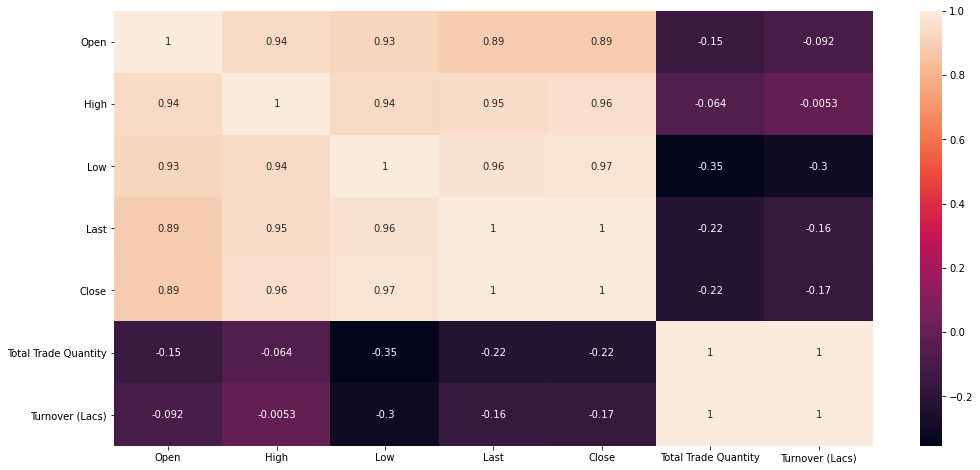

In [11]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [12]:
x = data.loc[:,'High':'Turnover (Lacs)']
y = data.loc[:,'Open']

In [13]:
x.head()

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [14]:
y.head()

0    1984.00
1    1983.00
2    2006.00
3    1998.00
4    1985.05
Name: Open, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5,random_state = 0)

In [28]:
LR = LinearRegression()

In [29]:
LR.fit(x_train,y_train)

LinearRegression()

In [30]:
LR.score(x_test,y_test)

0.6003138909084782

In [31]:
prediction = LR.predict(x_test)

In [32]:
print(prediction)

[1904.70215245 1975.38324538 1889.28428615 1974.78920897 2006.58187013
 1965.47142029 1977.38780555 1960.43369218 1992.86149758 1996.82102676]


In [33]:
check = pd.DataFrame(x_test, columns = ["High", "Turnover(lacs)"])

In [34]:
check["Actual"] = y_test

In [35]:
check["Predicted"] = prediction

In [36]:
check

,High,Turnover(lacs),Actual,Predicted
18,1920.0,NaN,1915.00,1904.702152
1,2019.4,NaN,1983.00,1975.383245
19,1909.0,NaN,1908.00,1889.284286
8,2029.7,NaN,2024.00,1974.789209
10,2004.9,NaN,1999.00,2006.581870
17,1941.7,NaN,1909.00,1965.471420
6,2010.0,NaN,1970.00,1977.387806
13,1974.9,NaN,1953.80,1960.433692
4,2003.9,NaN,1985.05,1992.861498
2,2018.0,NaN,2006.00,1996.821027
